### Signal processing application in 3 mins long G critical simluated LFPs

In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import hilbert, chirp
# import tools
# sys.path.append("/mnt/c/Users/wayne/tvb/tvbtools")
sys.path.append("/mnt/w/github/tvbtools")
from tools.signalTools import signalToolkit
import ipywidgets as widgets
my_layout = widgets.Layout()
plt.style.use('ggplot')
%matplotlib inline

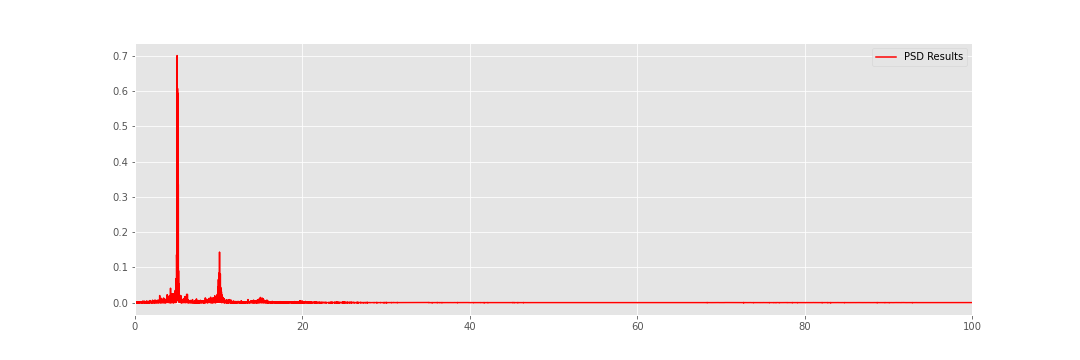

(array([0.00000000e+00, 5.55555556e-03, 1.11111111e-02, ...,
        4.09599833e+04, 4.09599889e+04, 4.09599944e+04]),
 array([1.39519491e-28, 4.39198554e-05, 8.67379377e-04, ...,
        1.36181527e-12, 3.52269491e-12, 2.11761252e-13]))

In [2]:
# import example data
# filename = "/mnt/c/Users/wayne/tvb/gc3mins/SNC/2820A.h5"
filename = "/mnt/w/go3mins/SNC/2820A.h5"
subjects = signalToolkit(filename, fs=81920.)
pcgleftAF, N, delay = subjects.signalpreprocessing(channelNum = 4, filter = True, low=50., high=60.)
rawpcgleft = subjects.signalpreprocessing(channelNum=4, filter=False)
rawspikesparas = {'prominence': 0.5, 'height': 1}
valleysparas = {'prominence': 1., 'width':3000, 'height': 0.}
filteredspikesparas = {'prominence': 0.5, 'width':3000, 'height': 0.}
spikeslist, valleyslist = subjects.peaksValleys(rawpcgleft, rawspikesparas,valleysparas)
spikeslistAF, valleyslistAF = subjects.peaksValleys(pcgleftAF, filteredspikesparas, valleysparas)
%matplotlib widget
subjects.psd(visual = True, digit = 111)
# subjects.signal_AF(data=rawpcgleft, spikeslist = spikeslist, valleyslist = valleyslist, N=N, delay=delay, afterFiltered = pcgleftAF, spikeslistAF = spikeslistAF, valleyslistAF = valleyslistAF,digit=111)